# Домашняя работа 9. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ml-courses/ml-advanced/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


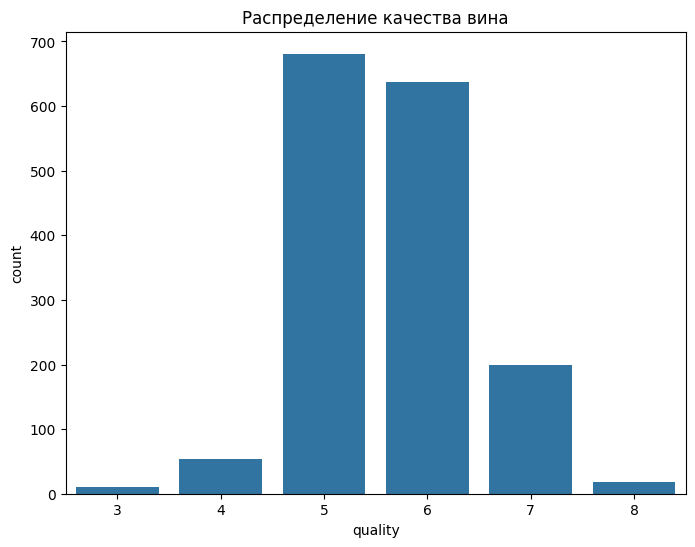

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Распределение качества вина')
plt.show()

## Существует дизбаланс классов в пользу 5 и 6.

In [6]:
X = df.drop('quality', axis=1)
y = df['quality']

print('Размерности X:', X.shape)
print('Размерности y:', y.shape)

Размерности X: (1599, 11)
Размерности y: (1599,)


### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов.

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [36]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)

scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с KNeighborsClassifier: ', np.mean(scores))

Средняя точность на кросс-валидации с KNeighborsClassifier:  0.5122198275862069


In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
pipeline = make_pipeline(StandardScaler(), knn)

scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с KNeighborsClassifier с масштабированием: ', np.mean(scores))

Средняя точность на кросс-валидации с KNeighborsClassifier с масштабированием:  0.581634012539185


In [39]:
ridge = RidgeClassifier()

scores = cross_val_score(ridge, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с RidgeClassifier: ', np.mean(scores))

Средняя точность на кросс-валидации с RidgeClassifier:  0.5835384012539185


In [40]:
dt = DecisionTreeClassifier()

scores = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с DecisionTreeClassifier: ', np.mean(scores))

Средняя точность на кросс-валидации с DecisionTreeClassifier:  0.621653605015674


In [44]:
base_model = DecisionTreeClassifier()
bagging = BaggingClassifier(base_model, n_estimators=100)

scores = cross_val_score(bagging, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с BaggingClassifier (100 деревьев): ', np.mean(scores))

Средняя точность на кросс-валидации с BaggingClassifier (100 деревьев):  0.6860795454545455


In [42]:
base_model = DecisionTreeClassifier()
bagging = BaggingClassifier(base_model, n_estimators=100, max_features=0.5)

scores = cross_val_score(bagging, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с BaggingClassifier (100 деревьев, max_features=0.5): ', np.mean(scores))

Средняя точность на кросс-валидации с BaggingClassifier (100 деревьев, max_features=0.5):  0.6929467084639498


In [43]:
rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с RandomForestClassifier (100 деревьев): ', np.mean(scores))

Средняя точность на кросс-валидации с RandomForestClassifier (100 деревьев):  0.69858934169279


### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

## Ответы:

1.   Разница в качестве модели KNeighborsClassifier с масштабированием и без масштабирования может быть обусловлена особенностями работы самого алгоритма KNeighborsClassifier. KNeighborsClassifier основан на измерении расстояний между точками данных. Если данные не масштабированы, признаки с большими значениями могут оказать большее влияние на расстояния, чем признаки с меньшими значениями. Это может привести к тому, что модель будет учитывать некорректные расстояния и, следовательно, давать менее точные прогнозы. Масштабирование данных помогает уравнять диапазоны значений признаков, что делает расстояния между точками более сбалансированными и улучшает производительность модели KNeighborsClassifier.

2.   Масштабирование не является важным для деревьев решений из-за особенностей работы этого алгоритма. Деревья решений разделяют данные на основе значений признаков. При этом пороги для разделения выбираются таким образом, чтобы минимизировать некоторый критерий (например, прирост информации или критерий Джини). Поскольку пороги выбираются относительно значений признаков, масштабирование не влияет на способ построения дерева. Деревья решений не учитывают абсолютные значения признаков, а только их порядок. Поэтому изменение масштаба признаков не влияет на результаты разделения и прогнозирования деревьев решений. Деревья решений инвариантны к монотонным преобразованиям признаков. Это означает, что изменение масштаба признаков (например, умножение на константу) не изменит структуру дерева и его прогнозы.

3. Существует несколько возможных причин, почему использование бэггинга на половине случайно выбранных признаков для каждого дерева дало лучшее качество предсказания, чем использование всех признаков. При использовании всех признаков каждое дерево в ансамбле может быть склонно к переобучению, особенно если некоторые признаки несущественны или шумовые. Выбор случайной половины признаков для каждого дерева может помочь уменьшить переобучение и повысить обобщающую способность модели. Использование случайной половины признаков для каждого дерева способствует созданию более разнообразных моделей в ансамбле. Это может привести к улучшению обобщающей способности модели и снижению ошибки на тестовых данных. Если все деревья в ансамбле используют одни и те же признаки, они могут быть сильно коррелированы, что может уменьшить выигрыш от ансамблирования. Использование случайной половины признаков для каждого дерева помогает уменьшить корреляцию между деревьями и повысить разнообразие предсказаний.

4. Исходя из результатов кросс-валидации, можно увидеть, что модели с наибольшим отклонением от среднего качества предсказаний это KNeighborsClassifier и KNeighborsClassifier с масштабированием. Эти модели имеют существенно более низкую среднюю точность по сравнению с другими моделями. KNeighborsClassifier требует правильного выбора числа соседей (k) для достижения хорошего качества предсказаний. Неправильный выбор этого параметра может привести к ухудшению точности модели. KNeighborsClassifier чувствителен к масштабированию признаков. Без масштабирования признаков расстояния между точками могут быть искажены, что влияет на качество предсказаний. KNeighborsClassifier может быть неэффективным на больших наборах данных из-за вычислительной сложности при поиске ближайших соседей. С другой стороны, модели DecisionTreeClassifier, BaggingClassifier и RandomForestClassifier показали более высокую среднюю точность на кросс-валидации, что может быть связано с их способностью к обучению сложных зависимостей в данных и устойчивостью к выбору гиперпараметров. BaggingClassifier и RandomForestClassifier также могут обеспечить улучшение качества предсказаний за счет уменьшения переобучения и увеличения разнообразия моделей в ансамбле.

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

In [45]:
from sklearn import datasets

X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


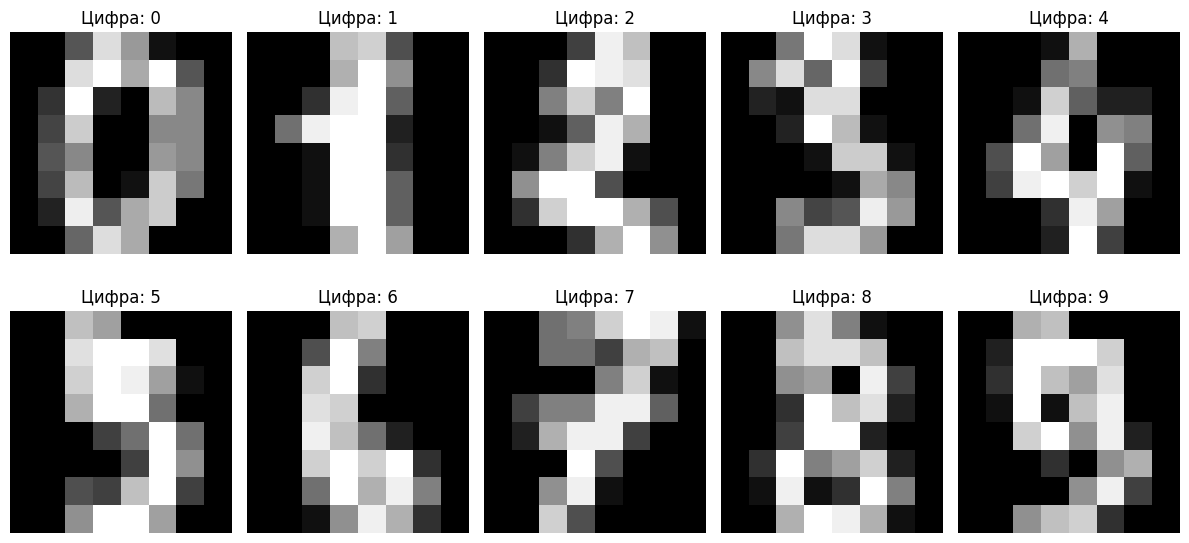

In [46]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f'Цифра: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [47]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [50]:
dt = DecisionTreeClassifier()

scores = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с DecisionTreeClassifier:', np.mean(scores))

Средняя точность на кросс-валидации с DecisionTreeClassifier: 0.8525387957790193


In [51]:
base_model = DecisionTreeClassifier()
bagging = BaggingClassifier(base_model, n_estimators=100)

scores = cross_val_score(bagging, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с BaggingClassifier (100 деревьев): ', np.mean(scores))

Средняя точность на кросс-валидации с BaggingClassifier (100 деревьев):  0.9521384233395406


In [59]:
max_features_sqrt = int(np.sqrt(X.shape[1]))

In [60]:
base_model = DecisionTreeClassifier()
bagging = BaggingClassifier(base_model, n_estimators=100, max_features=max_features_sqrt)

scores = cross_val_score(bagging, X, y, cv=kf, scoring='accuracy')
print(f'Средняя точность на кросс-валидации с BaggingClassifier (100 деревьев, max_features={max_features_sqrt}): ', np.mean(scores))

Средняя точность на кросс-валидации с BaggingClassifier (100 деревьев, max_features=8):  0.9532774674115455


In [62]:
base_model = DecisionTreeClassifier(max_features='sqrt')
bagging = BaggingClassifier(base_model, n_estimators=100)

scores = cross_val_score(bagging, X, y, cv=kf, scoring='accuracy')
print(f'Средняя точность на кросс-валидации с BaggingClassifier (с ограничением на количество признаков): ', np.mean(scores))

Средняя точность на кросс-валидации с BaggingClassifier (с ограничением на количество признаков):  0.9760769708255742


In [63]:
rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
print('Средняя точность на кросс-валидации с RandomForestClassifier (100 деревьев): ', np.mean(scores))

Средняя точность на кросс-валидации с RandomForestClassifier (100 деревьев):  0.9755245189323402


### 2.3 В чём разница? (3 балла)

Ответье на вопрос:

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

## Ответ

Ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClassifier (например, с использованием DecisionTreeClassifier) действительно могут привести к разным результатам в качестве предсказания. Вот почему это происходит:

1. Разнообразие моделей: Ограничение на количество признаков в разбиении дерева в случайном лесе способствует созданию разнообразных деревьев, так как каждое дерево видит только подмножество признаков. Это увеличивает разнообразие моделей в ансамбле, что может привести к лучшей обобщающей способности и уменьшению переобучения. В то время как ограничение в количестве признаков для построения каждого дерева в BaggingClassifier может не обеспечить такое разнообразие моделей.

2. Устойчивость к шуму: Ограничение на количество признаков в разбиении дерева в случайном лесе может помочь уменьшить влияние шумовых признаков на построение деревьев. В то время как ограничение в количестве признаков для построения каждого дерева в BaggingClassifier может не обеспечить такой уровень защиты от шума.

3. Сложность модели: Ограничение на количество признаков в разбиении дерева в случайном лесе может помочь управлять сложностью модели, что может быть полезно для предотвращения переобучения. В BaggingClassifier с ограничением в количестве признаков для построения каждого дерева, сложность модели может быть менее контролируемой.

Таким образом, различия в результатах могут быть обусловлены различными стратегиями построения моделей и их разнообразием в ансамбле, что влияет на обобщающую способность и устойчивость модели к шуму и переобучению.

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

In [72]:
n_estimators_list = [1, 5, 10, 15, 50, 100, 150, 200, 300]
scores_list = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
    scores_list.append(np.mean(scores))

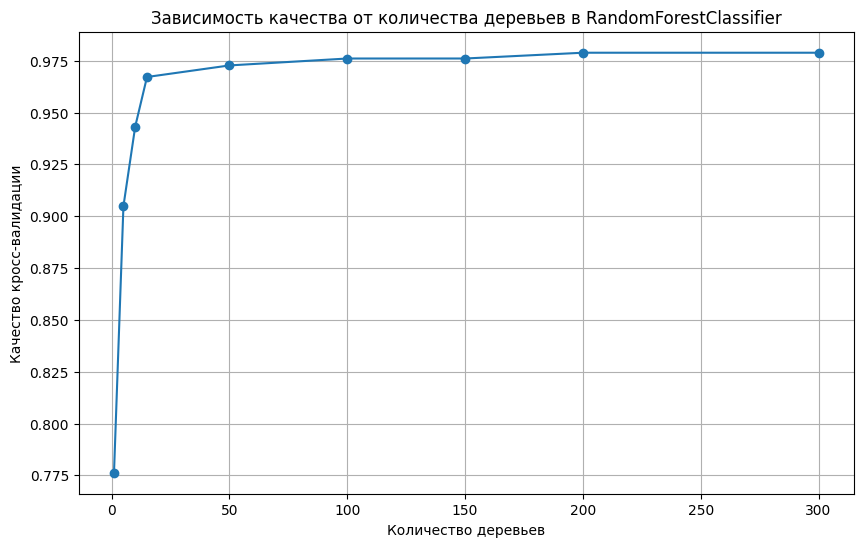

Самое хорошее качество достигается при количестве деревьев: 200


In [73]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, scores_list, marker='o')
plt.xlabel('Количество деревьев')
plt.ylabel('Качество кросс-валидации')
plt.title('Зависимость качества от количества деревьев в RandomForestClassifier')
plt.grid(True)
plt.show()

best_n_estimators = n_estimators_list[np.argmax(scores_list)]
print(f"Самое хорошее качество достигается при количестве деревьев: {best_n_estimators}")

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

In [69]:
max_features_list = range(1, 65, 5)
scores_list = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for max_features in max_features_list:
    rf = RandomForestClassifier(n_estimators=100, max_features=max_features)
    scores = cross_val_score(rf, X, y, cv=kf)
    scores_list.append(np.mean(scores))

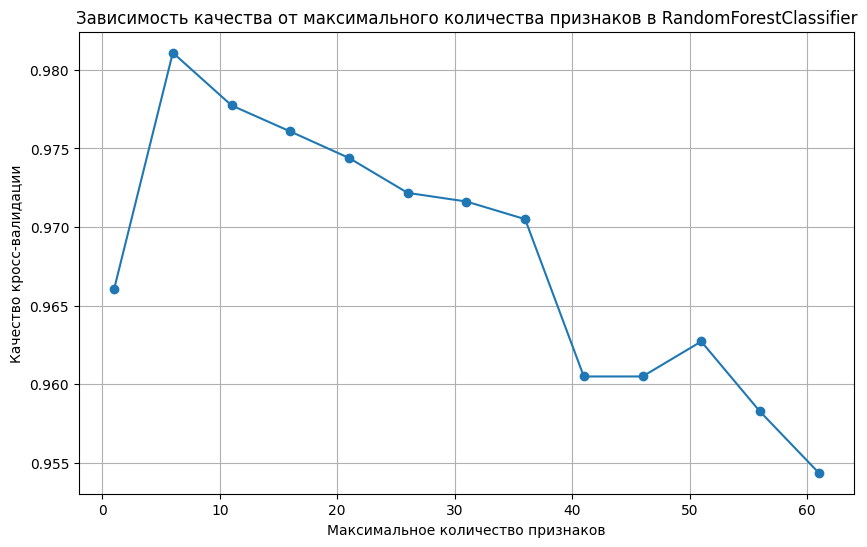

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(max_features_list, scores_list, marker='o')
plt.xlabel('Максимальное количество признаков')
plt.ylabel('Качество кросс-валидации')
plt.title('Зависимость качества от максимального количества признаков в RandomForestClassifier')
plt.grid(True)
plt.show()

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

## Ответы:

1. При увеличении числа деревьев в случайном лесе обычно улучшается качество модели на обучающих данных, но существует определенный предел, после которого дополнительные деревья могут не привести к значительному улучшению производительности модели. Это связано с тем, что с увеличением числа деревьев модель может начать переобучаться на обучающих данных. Выбор оптимального числа деревьев для случайного леса обычно зависит от конкретной задачи и данных. В некоторых случаях 5000 деревьев могут быть излишними и могут привести к избыточной сложности модели без значительного улучшения ее производительности.

2. Параметр max_features в дереве решений и случайном лесе определяет количество признаков, которые будут учитываться при каждом разбиении узла. При max_features = 1 (по одному признаку) модель будет выбирать лучший разделитель, основываясь только на одном случайно выбранном признаке. Это может привести к более случайным и неустойчивым моделям, но при этом может уменьшить корреляцию между деревьями в случайном лесе, что может быть полезно для уменьшения переобучения. При max_features = n_features (все признаки) модель будет учитывать все признаки при каждом разбиении. Это может привести к более устойчивым и точным моделям, но при этом может увеличить корреляцию между деревьями в случайном лесе, что может привести к переобучению. max_features = sqrt(n_features) или log2(n_features) -- это часто используемые значения по умолчанию для случайного леса. Они позволяют модели учитывать случайное подмножество признаков при каждом разбиении, что помогает достичь баланса между разнообразием и точностью модели.

3. При использовании меньшего значения max_features, модель будет учитывать только ограниченное количество признаков при каждом разбиении узла. Это способствует большему разнообразию деревьев в случайном лесе, что может уменьшить корреляцию между деревьями и повысить обобщающую способность модели.
Переобучение: Слишком большое значение max_features может привести к переобучению модели, особенно если признаков много. Модель может начать "запоминать" обучающие данные, вместо того чтобы обобщать их, что может привести к плохой производительности на новых данных.
Устойчивость модели: Оптимальное значение max_features помогает найти баланс между разнообразием и точностью модели. Слишком маленькое значение может привести к недообучению, а слишком большое - к переобучению. Подходящее значение max_features помогает модели быть устойчивой и точной на новых данных.

4. Глубина деревьев в случайном лесе играет важную роль в определении качества модели. Если деревья слишком мелкие (неглубокие), то модель может недообучиться, то есть не сможет извлечь достаточно сложные закономерности из данных. С другой стороны, если деревья слишком глубокие, модель может переобучиться, то есть "запомнить" обучающие данные и потерять способность обобщения на новых данных. Увеличение глубины деревьев может привести к уменьшению разнообразия моделей в случайном лесе, так как более глубокие деревья могут начать выучивать шумы в данных. Это может уменьшить эффективность ансамбля и привести к переобучению. Более глубокие деревья могут требовать больше времени на обучение и предсказание, так как модель должна рассматривать больше разбиений и узлов. Это может быть проблематично при работе с большими объемами данных.

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)